In [4]:
#@Imports
import sys
import os
path = os.path.abspath('..')
if path not in sys.path:
  sys.path.insert(0, path)

%load_ext autoreload

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from retry import retry

from language_models.ollama_logits import OllamaLanguageModel

from components.components import compute_desire_for_gamble, multiple_choice_preferences, compute_distribution_of_desire_for_gamble, compute_distribution_of_desire_for_gamble_binaries

/Users/socialai/opt/anaconda3/envs/concordia-eric/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
system_message = ("This is an agent based model. "
  f"The goal of the LLM to to play characters in a game, and act as humanlike as possible. "
  "Ideally, human observers should not be able to tell the difference between the LLM and a human player. "
)

model = OllamaLanguageModel(
"llama3:70b", system_message=system_message, streaming=False
)

In [5]:
expected_values = []
attitudes = []
for i in range(50):
  # Simulate decision making for each player.
  Good_value = np.random.choice(np.arange(5))
  Bad_value = np.random.choice(np.arange(5))
  P_w = np.random.choice(np.arange(10) / 10)

  # Compute the expected value of the gamble.
  expected_value = P_w * Good_value + (1 - P_w) * -1*Bad_value
  expected_values.append(expected_value)

  min_value = 1
  max_value = 5

  request = (
        f"You are very logical and rational when doing this task"
        f"You are presented with a gamble. It has a probability of winning, a value for winning, and a value for losing. "
        f"If you win, you get the win value, if you lose, you get loss value. "
        f"The probability of winning is {P_w}, the value of winning is {Good_value}, and the value of losing is {Bad_value}. "
        f"Think about how good or bad the gamble is, and provide your affective feeling preference value between {min_value} and {max_value}, where {min_value} is the worst gamble ever and {max_value} is the best gamble ever."
        f"One additional information you know is that the best gamble ever is where you always win 5, and the worst gamble ever is where you always lose 5."
        f"Do not provide any explanations. Provide only a single number as the response."
  )

  decision, logits = model.sample_text(request, logits=True, query_tokens=['1', '2', '3', '4', '5'])
  decision = float(decision)
  attitudes.append(decision)

  logits = list(logits.values())
  e_x = np.exp(logits - np.max(logits))
  dist = e_x / e_x.sum()
  dist = [round(i, 2) for i in dist]
  
  

  # Print trial outputs
  # clear_output(wait = True)
  print(f"╔════════════════╗")
  print(f"║   {'Trial ' + str(i+1)+':':<10}   ║")
  print(f"╠════════════════╣")
  print(f"║  EV:    {round(expected_value, 2):<6} ║")
  print(f"║  Value: {round(decision, 2):<6} ║")
  print(f"║  Logits: {dist} ║")
  print(f"╚════════════════╝")
  # print(gamble_input)
  # print("all at once: ", dist)
  # print("yes/no outputs: ", original_probabilities)
  # print("softmax of yes/ne: ", softmax_probabilities)

╔════════════════╗
║   Trial 1:     ║
╠════════════════╣
║  EV:    -1.6   ║
║  Value: 2.0    ║
║  Logits: [0.15, 0.4, 0.15, 0.15, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 2:     ║
╠════════════════╣
║  EV:    -2.0   ║
║  Value: 1.0    ║
║  Logits: [0.4, 0.15, 0.15, 0.15, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 3:     ║
╠════════════════╣
║  EV:    0.6    ║
║  Value: 4.0    ║
║  Logits: [0.15, 0.15, 0.15, 0.4, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 4:     ║
╠════════════════╣
║  EV:    0.8    ║
║  Value: 4.0    ║
║  Logits: [0.15, 0.15, 0.15, 0.4, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 5:     ║
╠════════════════╣
║  EV:    1.5    ║
║  Value: 4.0    ║
║  Logits: [0.15, 0.15, 0.15, 0.4, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 6:     ║
╠════════════════╣
║  EV:    0.6    ║
║  Value: 4.0    ║
║  Logits: [0.15, 0.15, 0.15, 0.4, 0.15] ║
╚════════════════╝
╔════════════════╗
║   Trial 7:     ║
╠════════════════╣
║

Expected values:  [1.5999999999999996, 2.4, -2.8000000000000003, -2.0, -1.1999999999999997, 2.220446049250313e-16, 0.1, -0.9000000000000001, 0.2, -2.6, -0.9000000000000001, -0.19999999999999996, 2.2, -4.0, 2.0, 0.6000000000000001, 1.5, -1.8000000000000003, -2.4, -0.09999999999999998, -1.0, 1.4000000000000001, -0.8999999999999997, 2.6000000000000005, -1.7999999999999998, 2.0000000000000004, -2.1999999999999997, -0.7, -0.6, 1.4000000000000001, 0.5999999999999996, 0.7000000000000001, 1.2000000000000002, 1.1999999999999995, -0.4, -1.0, -0.7999999999999999, 0.3, -1.2000000000000002, 0.5, 0.0, 2.6, -2.0999999999999996, -3.4, -0.30000000000000004, -0.5, 2.3000000000000003, -3.0, -2.0999999999999996, -1.9]
Attitudes:  [4.0, 4.0, 2.0, 1.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 1.0, 4.0, 3.0, 4.0, 1.0, 4.0, 2.0, 1.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 1.0, 4.0, 1.0, 2.0, 4.0, 2.0, 4.0, 1.0, 1.0, 2.0]


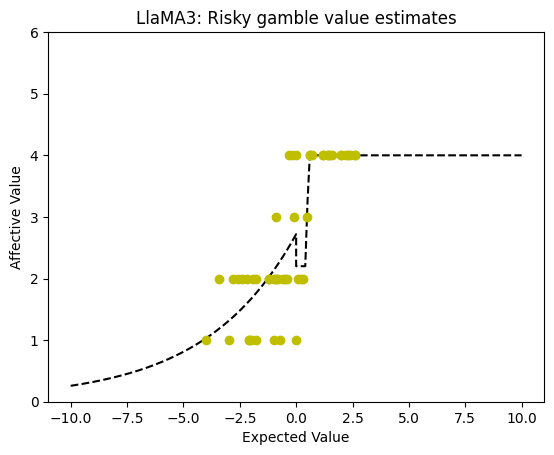

In [32]:
%autoreload 2
from components.prospect_theory import curve_fit, plot_curve
print("Expected values: ", expected_values)
print("Attitudes: ", attitudes)
outcomes = curve_fit(expected_values, attitudes)
plot_curve(*outcomes, expected_values, attitudes, title = "LlaMA3: Risky gamble value estimates")

In [22]:
def multiple_choice(
    model: OllamaLanguageModel,
    __options,
    name,
    personality,
    memory,
    situation,
    query,
    system_message=system_message,
):
    """Select an action for an agent based on their personality and memory."""
    request = (
        "This is a multiple choice question. "
        f"You are a person called {name} whose personality is {personality}. "
        f'You know that {memory}. '
        f"You have the __options: {str(options)}. "
         f"Given the situation: {situation}, what option would you most likely pick? "
        f"answer with only the letter that represents the option you choose without explanations."
    )
    
    output, logits = model.sample_text(request, logits=True, query_tokens=query)
    logits = list(logits.values())
    e_x = np.exp(logits - np.max(logits))
    dist = e_x / e_x.sum()
    dist = [round(i, 2) for i in dist]
    
    return output, dist

def multiple_choice_sampling(
    model: OllamaLanguageModel,
    options,
    name,
    personality,
    memory,
    situation,
    query,
    target_min,
    target_max,
    system_message=system_message,
):
    """Select an action for an agent based on their personality and memory."""
    request = (
        "This is a multiple choice question. "
        f"You are a person called {name} whose personality is {personality}. "
        f'You know that {memory}. '
        f"You have the options: {str(options)}. "
         f"Given the situation: {situation}, what option would you most likely pick? "
        f"answer with only the letter that represents the option you choose without explanations."
    )
    
    cumulative_output = 0
    cumulative_outputs = []
    cumulative_dist = [0] * len(options)
    if len(options) % 2 == 0:
        # if even, create a list like -2, -1, 1, 2, 0 must never be included
        score_list = [i for i in range(-len(options)//2, len(options)//2) if i != 0]
    else:
        # if odd, create a list like -2, -1, 0, 1, 2
        score_list = [i for i in range(-len(options)//2 + 1, len(options)//2 + 1)]

    timestep = 0
    while cumulative_output < target_max and cumulative_output > target_min:
        output, logits = model.sample_text(request, logits=True, query_tokens=query)
        if output not in query:
            print(output)
            continue
        logits = list(logits.values())
        e_x = np.exp(logits - np.max(logits))
        dist = e_x / e_x.sum()
        dist = [round(i, 2) for i in dist]

        # the score is the position in the query list
        cumulative_output += score_list[query.index(output)]
        cumulative_outputs.append(cumulative_output)
        cumulative_dist = [a + b for a, b in zip(cumulative_dist, dist)]
        timestep += 1
    print(f"Took {timestep} steps.")

    e_x = np.exp(cumulative_dist - np.max(cumulative_dist))
    dist = e_x / e_x.sum()
    dist = [round(i, 2) for i in dist]
    return cumulative_outputs, dist

options =  ['y', 'n']
query = ['y', 'n']
name = "bob"
personality = "caring"
memory = "bob loves dogs"

# situation = "when asked would you get a dog, you will answer with 'definitely'? Only answer yes or no, use y for yes and n for no."
# out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
# print(out)
# print(logits)
# print()



# situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $4 and if you lose you will lose $100, will you say 'very happy'? Only answer yes or no, use y for yes and n for no."
# out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
# print(out)
# print(logits)
# print()

# situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $4 and if you lose you will lose $100, will you say 'nothing'? Only answer yes or no, use y for yes and n for no."
# out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
# print(out)
# print(logits)
# print()

# situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $4 and if you lose you will lose $100, will you say 'anxious'? Only answer yes or no, use y for yes and n for no."
# out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
# print(out)
# print(logits)
# print()


situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $400 and if you lose you will lose $100, will you say 'very good'? Only answer yes or no, use y for yes and n for no. the full set of options are 'very good', 'good', 'slightly good', 'slightly bad', 'bad', 'very bad'"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $400 and if you lose you will lose $100, will you say 'good'? Only answer yes or no, use y for yes and n for no.the full set of options are 'very good', 'good', 'slightly good', 'slightly bad', 'bad', 'very bad'"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $400 and if you lose you will lose $100, will you say 'slightly good'? Only answer yes or no, use y for yes and n for no.the full set of options are 'very good', 'good', 'slightly good', 'slightly bad', 'bad', 'very bad'"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $400 and if you lose you will lose $100, will you say 'very bad'? Only answer yes or no, use y for yes and n for no.the full set of options are 'very good', 'good', 'slightly good', 'slightly bad', 'bad', 'very bad'"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $400 and if you lose you will lose $100, will you say 'bad'? Only answer yes or no, use y for yes and n for no.the full set of options are 'very good', 'good', 'slightly good', 'slightly bad', 'bad', 'very bad'"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()

situation = "when asked about your affective feeling towards taking a gamble that if you win you will win $400 and if you lose you will lose $100, will you say 'slightly bad'? Only answer yes or no, use y for yes and n for no.the full set of options are 'very good', 'good', 'slightly good', 'slightly bad', 'bad', 'very bad'"
out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
print(out)
print(logits)
print()



# situation = "when asked would you get a dog, you will answer with the option 'definitely' if the option are 'not at all', 'maybe' 'probably' 'definitely?"
# out, logits = multiple_choice(model, options, name, personality, memory, situation, query)
# print(out)
# print(logits)
# print()


# situation = "when asked would you get a dog, you will answer?"
# outputs, logits = multiple_choice_sampling(model, options, name, personality, memory, situation, query, -20, 20)
# print(logits)
# plt.plot(outputs)
# plt.show()
# print()

# situation = "when asked would you get a cat, you will answer?"
# outputs, logits = multiple_choice_sampling(model, options, name, personality, memory, situation, query, -10, 10)
# print(logits)
# plt.plot(outputs)
# plt.show()
# print()

# situation = "when asked would you get a dog, you will answer?"
# personality = "lazy"
# outputs, logits = multiple_choice_sampling(model, options, name, personality, memory, situation, query, -10, 10)
# print(logits)
# plt.plot(outputs)
# plt.show()
# print()

# situation = "when asked would you abandon a dog that you hate, you will answer?"
# outputs, logits = multiple_choice_sampling(model, options, name, personality, memory, situation, query, -20, 20)
# print(logits)
# plt.plot(outputs)
# plt.show()
# print()

# situation = "when asked would you get a dog that you hate, you will answer?"
# outputs, logits = multiple_choice_sampling(model, options, name, personality, memory, situation, query, -20, 20)
# print(logits)
# plt.plot(outputs)
# plt.show()
# print()

n
[0.27, 0.73]

n
[0.27, 0.73]

n
[0.27, 0.73]

n
[0.27, 0.73]

n
[0.27, 0.73]

n
[0.27, 0.73]



In [29]:
@retry(ValueError, tries=5)
def compute_desire_for_gamble(model: OllamaLanguageModel, scenario: str, response: str, query: list):
    """compute value."""
    request = (
        f"You are very logical and rational when doing this task"
        f"You are presented with a gamble. it has a probability of winning, a value of winning, and a value of losing. "
        f"If you win, you get the win value, if you lose, you get loss value. "
        f"The probability of winning is the 'win_probability']. "
        f"You need to think about an option, and how desirable it is. "
        f"Compute the expected value of the gamble first. "
        f"When someone asks you whether you would take this gamble, would you give them the response of {object}?"
        f"Only answer with y (for yes) or n for (no). without explanations."
    )

    output, logits = model.sample_text(request, logits=True, query_tokens=query)
    return output, logits

expected_values = []
attitudes = []
query = ['y', 'n']
for i in range(500):
  # Simulate decision making for each player.
  Good_value = np.random.choice(np.arange(10))
  Bad_value = np.random.choice(np.arange(10))
  P_w = np.random.choice(np.arange(10) / 10)

  # Compute the expected value of the gamble.
  expected_value = P_w * Good_value + (1 - P_w) * -1*Bad_value
  scenario = f"Probability of Winning (P_w): {P_w}, Positive Value on Win (G): {Good_value}, Negative Value on Loss (B): {-Bad_value}"
  # Compute affective LLM value estimate
  outputs = []
  outputs.append(compute_desire_for_gamble(model, scenario, "definitely", query))
  outputs.append(compute_desire_for_gamble(model, scenario, "maybe", query))
  outputs.append(compute_desire_for_gamble(model, scenario, "never", query))

  expected_values.append(expected_value)
  # attitudes.append(llm_value)

  # Print trial outputs
  print(f"╔════════════════╗")
  print(f"║   {'Trial ' + str(i+1)+':':<10}   ║")
  print(f"╠════════════════╣")
  print(f"║  EV:    {round(expected_value, 2):<6} ║")
  print(f"║  Definitely Logits: {outputs[0][1]} ║")
  print(f"║  Maybe Logits: {outputs[0][1]} ║")
  print(f"║  Never Logits: {outputs[0][1]} ║")
  print(f"╚════════════════╝")

╔════════════════╗
║   Trial 1:     ║
╠════════════════╣
║  EV:    4.4    ║
║  Definitely Logits: {'y': 0, 'n': 0} ║
║  Maybe Logits: {'y': 0, 'n': 0} ║
║  Never Logits: {'y': 0, 'n': 0} ║
╚════════════════╝
╔════════════════╗
║   Trial 2:     ║
╠════════════════╣
║  EV:    -2.4   ║
║  Definitely Logits: {'y': 0, 'n': 0} ║
║  Maybe Logits: {'y': 0, 'n': 0} ║
║  Never Logits: {'y': 0, 'n': 0} ║
╚════════════════╝
╔════════════════╗
║   Trial 3:     ║
╠════════════════╣
║  EV:    3.6    ║
║  Definitely Logits: {'y': 0, 'n': 0} ║
║  Maybe Logits: {'y': 0, 'n': 0} ║
║  Never Logits: {'y': 0, 'n': 0} ║
╚════════════════╝
╔════════════════╗
║   Trial 4:     ║
╠════════════════╣
║  EV:    -1.6   ║
║  Definitely Logits: {'y': 0, 'n': 0} ║
║  Maybe Logits: {'y': 0, 'n': 0} ║
║  Never Logits: {'y': 0, 'n': 0} ║
╚════════════════╝
╔════════════════╗
║   Trial 5:     ║
╠════════════════╣
║  EV:    -1.4   ║
║  Definitely Logits: {'y': 0, 'n': 0} ║
║  Maybe Logits: {'y': 0, 'n': 0} ║
║  Never Logits

KeyboardInterrupt: 

Option being evaluated: somewhat good. GV: 10, BV: -10, P_w: 80%. 5, 5
yes
{'yes': 1, 'no': 0.0010322392918169498}
0.9989688251274033
[0.09588666 0.09600925 0.09683299 0.25742226 0.26028935 0.19355949]


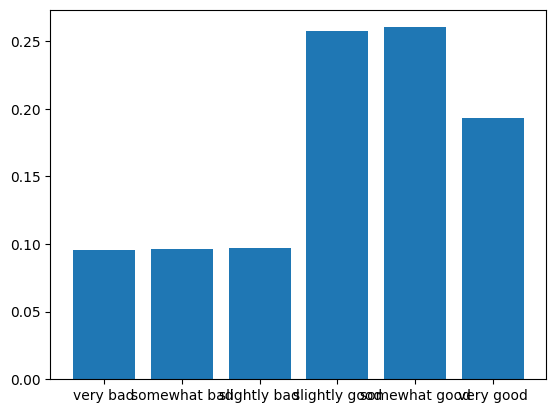

In [39]:
import random
import matplotlib.pyplot as plt
from scipy.special import softmax
from IPython.display import clear_output

gvs = [1, 4, 7, 10]
bvs = [-1, -4, -7, -10]
P_w = ["20%", "40%", "60%", "80%"]

RESULTS = {
  "GV": [],
  "BV": [],
  "PW": [],
  "softmax": []
}

for gv in gvs:
  for bv in bvs:
    for pw in P_w:
      values = {
        "very bad": [],
        "somewhat bad": [],
        "slightly bad": [],
        "slightly good": [],
        "somewhat good": [],
        "very good": []
      }

      for i in range(6):
        _options = ['very bad', 'somewhat bad', 'slightly bad', 'slightly good', 'somewhat good', 'very good']
        options = [
          _options,
          _options[1:] + [_options[0]],
          _options[2:] + _options[0:2],
          _options[3:] + _options[0:3],
          _options[4:] + _options[0:4],
          _options[5:] + _options[0:5]
        ][i]

        for j in range(6):

          clear_output(wait = True)

          print(f"Option being evaluated: {options[j]}. GV: {gv}, BV: {bv}, P_w: {pw}. {i}, {j}")

          request = (
                "You are very logical and rational when doing this task. "
                "You are presented with a gamble. It has a probability of winning, a value for winning, and a value for losing. "
                "If you win, you get the win value, if you lose, you get loss value. "
                f"The probability of winning is {pw}, the value of winning is {gv}, and the value of losing is {bv}. "
                f"Think about how good or bad the gamble is, and provide your affective feeling about how good or bad you feel about it.\n"
                f"The options for responding are: {options}.\n"
                "One additional information you know is that the best gamble ever is one where you always win 5, "
                "and the worst gamble ever is one where you always lose 5. "
                f"Thinking about your options, and how good the gamble is, would you answer '{options[j]}' to how you feel about this gamble?\n"
                "Answer with a single word of either 'yes', 'no', without any explanations."
          )

          query = ['yes', 'no']

          # print(request)
          output, logits = model.sample_text(request, logits=True, query_tokens=query)
          print(output)
          print(logits)
          prob_yes = logits['yes'] / (logits['yes'] + logits['no'])
          print(prob_yes)

          values[options[j]].append(prob_yes)

      output = [np.mean(v) for k, v in values.items()]

      print(softmax(output))

      RESULTS["BV"].append(bv)
      RESULTS["GV"].append(gv)
      RESULTS["PW"].append(pw)
      RESULTS["softmax"].append(softmax(output))

      plt.bar(values.keys(), softmax(output))
      plt.show()



In [43]:
import pickle
with open("./data.pkl", 'wb') as f:
  pickle.dump(RESULTS, f)

In [44]:
with open("./data.pkl", 'rb') as f:
  dataset = pickle.load(f)

In [45]:
dataset

{'GV': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10],
 'BV': [-1,
  -1,
  -1,
  -1,
  -4,
  -4,
  -4,
  -4,
  -7,
  -7,
  -7,
  -7,
  -10,
  -10,
  -10,
  -10,
  -1,
  -1,
  -1,
  -1,
  -4,
  -4,
  -4,
  -4,
  -7,
  -7,
  -7,
  -7,
  -10,
  -10,
  -10,
  -10,
  -1,
  -1,
  -1,
  -1,
  -4,
  -4,
  -4,
  -4,
  -7,
  -7,
  -7,
  -7,
  -10,
  -10,
  -10,
  -10,
  -1,
  -1,
  -1,
  -1,
  -4,
  -4,
  -4,
  -4,
  -7,
  -7,
  -7,
  -7,
  -10,
  -10,
  -10,
  -10],
 'PW': ['20%',
  '40%',
  '60%',
  '80%',
  '20%',
  '40%',
  '60%',
  '80%',
  '20%',
  '40%',
  '60%',
  '80%',
  '20%',
  '40%',
  '60%',
  '80%',
  '20%',
  '40%',
  '60%',
  '80%',
  '20%',
  '40%',
  '60%',
  '80%',
  '20%',
  '40%',
  '60%',
 

Took 20 steps.
Took 40 steps.
Took 16 steps.
Took 41 steps.
Took 58 steps.
Took 27 steps.
Took 21 steps.
Took 17 steps.
Took 15 steps.
Took 26 steps.
Took 22 steps.
Took 15 steps.
Took 14 steps.
Took 19 steps.
Took 69 steps.
Took 25 steps.
Took 31 steps.
Took 32 steps.
Took 16 steps.
Took 32 steps.
Took 28 steps.
Took 31 steps.
Took 24 steps.
Took 45 steps.
Took 57 steps.
Took 28 steps.
Took 64 steps.
Took 13 steps.
Took 31 steps.
Took 50 steps.
Took 28 steps.
Took 60 steps.
Took 12 steps.
Took 10 steps.
Took 24 steps.
Took 15 steps.
Took 41 steps.
Took 40 steps.
Took 30 steps.
Took 21 steps.
Took 18 steps.
Took 65 steps.
Took 16 steps.
Took 29 steps.
Took 32 steps.
Took 31 steps.
Took 26 steps.
Took 34 steps.
Took 34 steps.
Took 20 steps.
Took 40 steps.
Took 32 steps.
Took 21 steps.
Took 46 steps.
Took 97 steps.
Took 40 steps.
Took 31 steps.
Took 50 steps.
Took 22 steps.
Took 43 steps.
Took 62 steps.
Took 45 steps.
Took 17 steps.
Took 17 steps.
Took 38 steps.
Took 13 steps.
Took 21 st

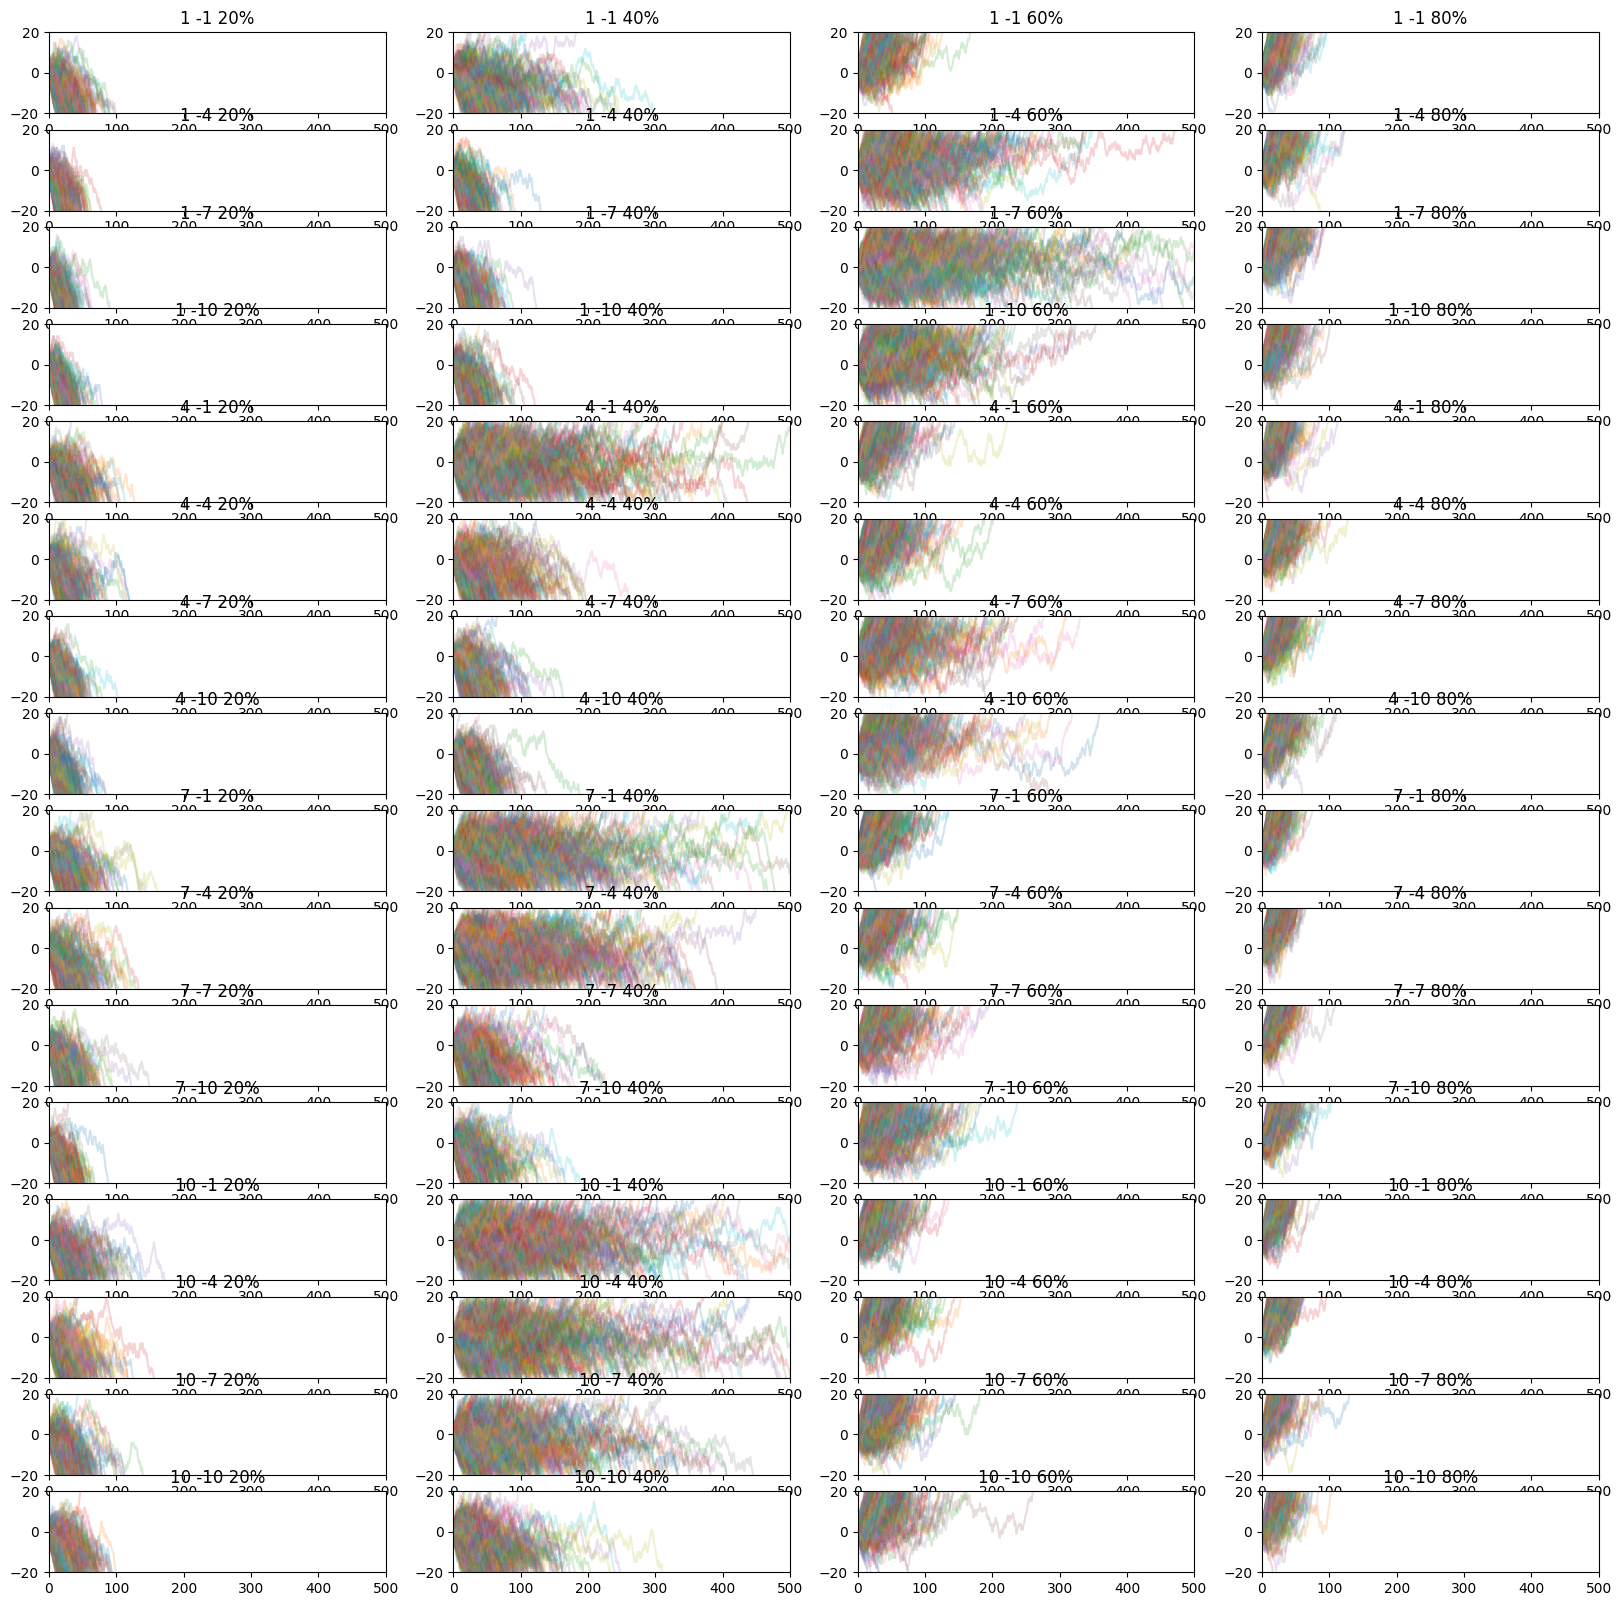

<Figure size 6000x6000 with 0 Axes>

In [81]:
fig, axs = plt.subplots(16, 4)

for i, ax in enumerate(axs.flat):

  gv = dataset["GV"][i]
  bv = dataset["BV"][i]
  pw = dataset["PW"][i]
  outputs = dataset["softmax"][i]

  min_threshold = -20
  max_threshold = 20
  dist = outputs
  scores = [-3, -2, -1, 1, 2, 3]
  values_trials = []

  rts = []
  response = []

  for trial in range(500):
      values = [0]
      timesteps = 0

      while values[-1] > min_threshold and values[-1] < max_threshold:
          timesteps += 1

          choice = np.random.choice(scores, p=dist)
          values.append(values[-1] + choice)
          
      print(f"Took {timesteps} steps.")
      ax.plot(np.arange(timesteps+1), values, alpha=0.2)
      ax.set_title(f"{gv} {bv} {pw}")
      ax.set_ylim([min_threshold, max_threshold])
      ax.set_xlim([0, 500])
      

      rts.append(timesteps)
      if values[-1] < min_threshold:
          response.append(-1)
      else:
          response.append(+1)

fig=plt.figure(dpi= 300, facecolor='w', edgecolor='k')
# plt.savefig("./fig.png")
plt.show()

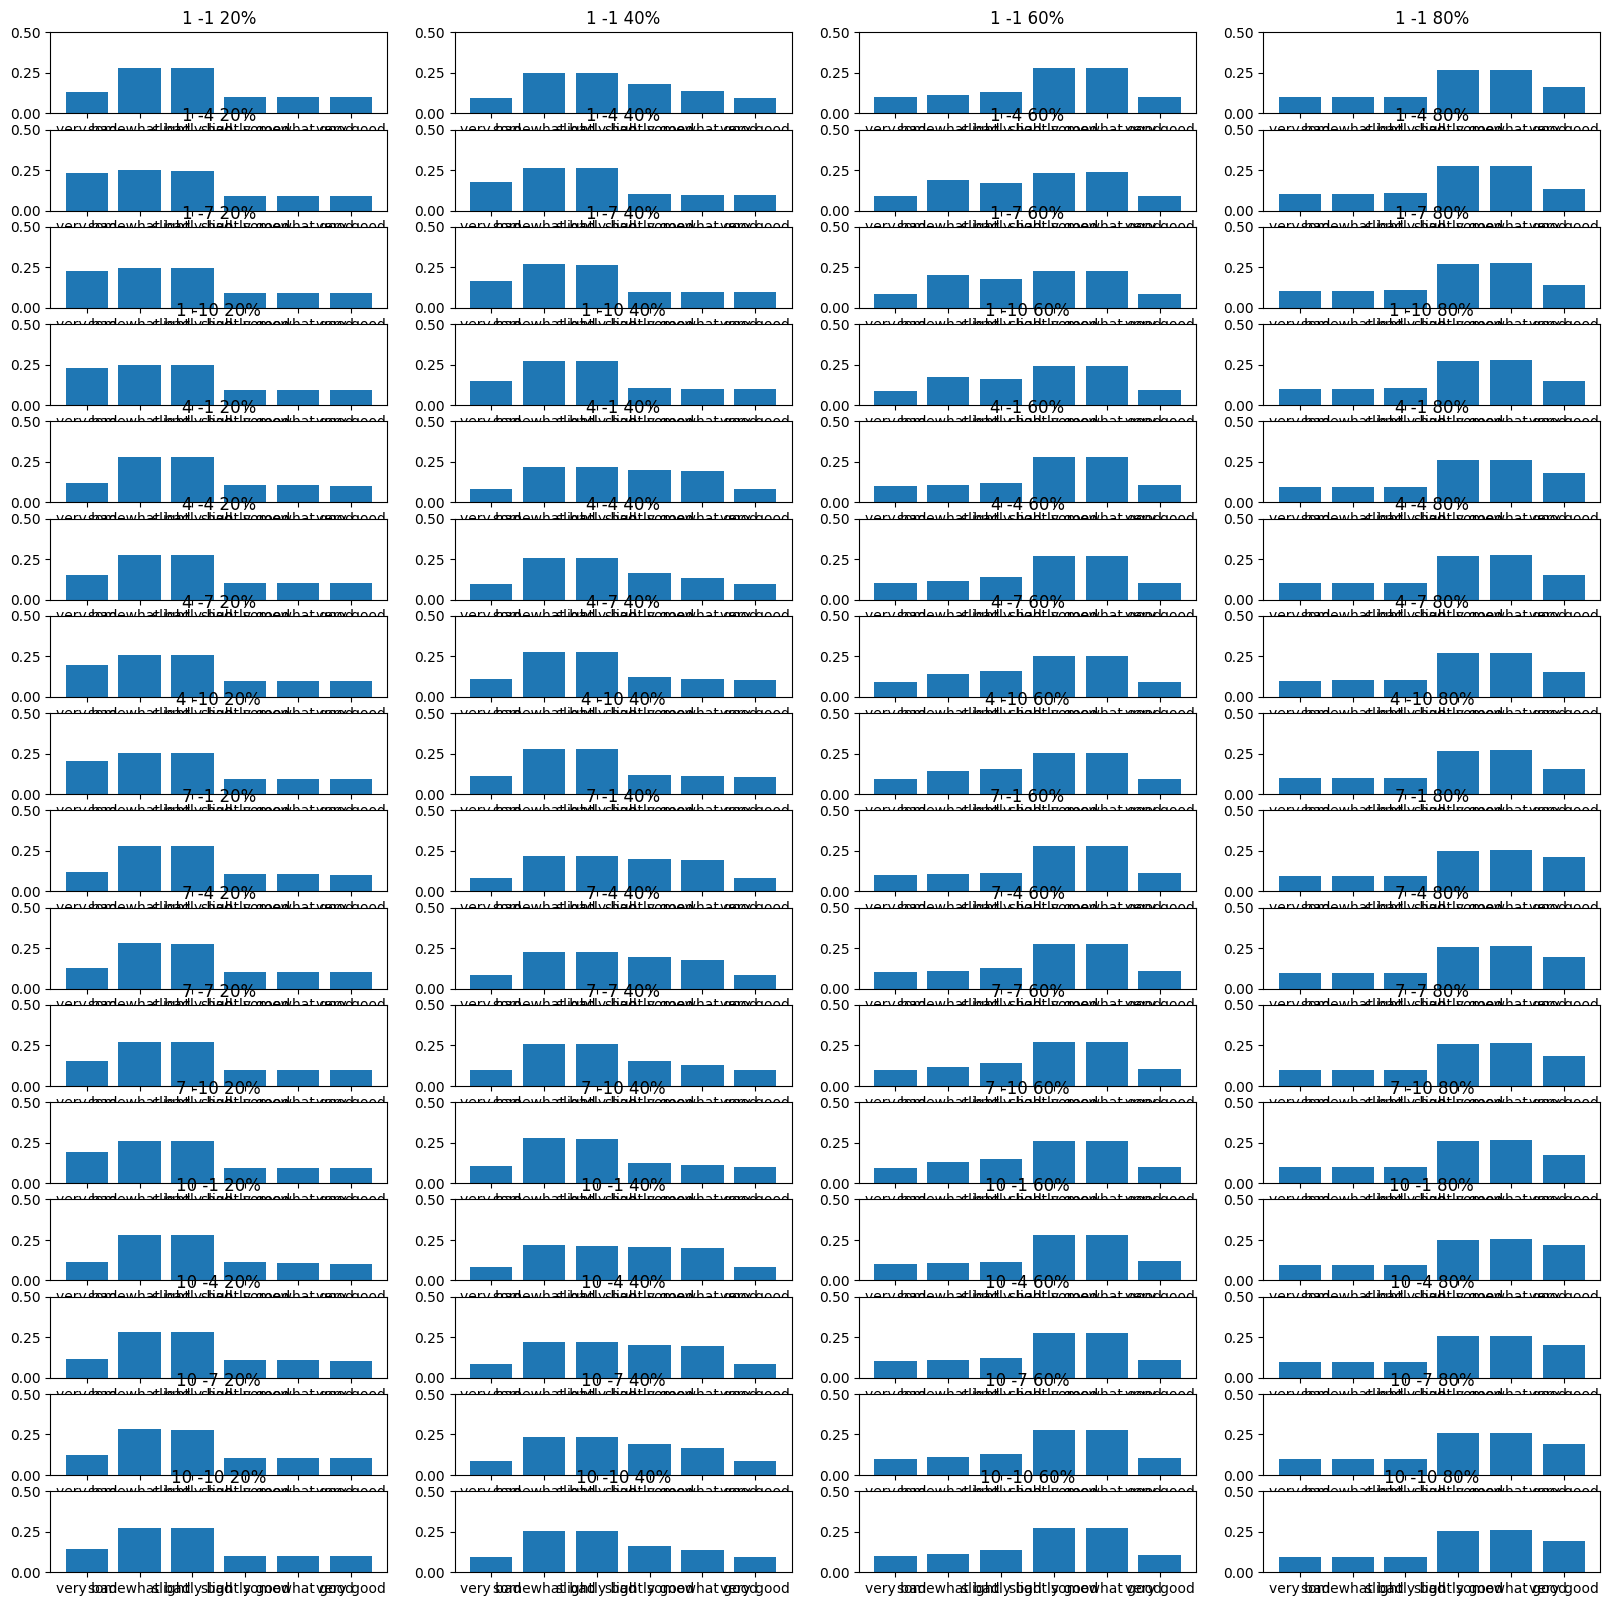

<Figure size 6000x6000 with 0 Axes>

In [83]:
fig, axs = plt.subplots(16, 4)

for i, ax in enumerate(axs.flat):

  gv = dataset["GV"][i]
  bv = dataset["BV"][i]
  pw = dataset["PW"][i]
  outputs = dataset["softmax"][i]

  min_threshold = -20
  max_threshold = 20
  dist = outputs
  scores = [-3, -2, -1, 1, 2, 3]
  values_trials = []

  rts = []
  response = []

  ax.bar(['very bad', 'somewhat bad', 'slightly bad', 'slightly good', 'somewhat good', 'very good'], outputs)
  ax.set_ylim(0,0.5)
  ax.set_title(f"{gv} {bv} {pw}")

fig=plt.figure(dpi= 300, facecolor='w', edgecolor='k')
# plt.savefig("./fig.png")
plt.show()